<a href="https://colab.research.google.com/github/amirularsyad/MachineLearningCourse_HW_TelU/blob/main/4thWeek/Kc_House_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#Muhammad Amirul Arsyad Arrayyan
#1103204207
#Tugas Week 4
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import size
import ipywidgets as widgets
from ipywidgets import interact

In [13]:
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
file_path = ('/content/drive/MyDrive/Dataset/kc_house_data.csv')

# membaca dataset menjadi dataframe
df = pd.read_csv(file_path)

# menampilkan lima baris pertama dataframe
print(df.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7      1180.0              0   
1      7242     2.0           0     0  ...      7      2170.0            400   
2     10000     1.0           0     0  ...      6       770.0              0   
3      5000     1.0           0     0  ...      7      1050.0            910   
4      8080     1.0           0     0  ...      8      1680.0              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [15]:
# Menampilkan jumlah nilai unik untuk setiap fitur
features = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view','grade','sqft_above','sqft_basement', 'yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']
# Menampilkan fitur
for feature in features:
  print(f"Jumlah Unique valuen for {feature}: {df[feature].nunique()}")

Jumlah Unique valuen for id: 21436
Jumlah Unique valuen for date: 372
Jumlah Unique valuen for price: 4028
Jumlah Unique valuen for bedrooms: 13
Jumlah Unique valuen for bathrooms: 30
Jumlah Unique valuen for sqft_living: 1038
Jumlah Unique valuen for sqft_lot: 9782
Jumlah Unique valuen for floors: 6
Jumlah Unique valuen for waterfront: 2
Jumlah Unique valuen for view: 5
Jumlah Unique valuen for grade: 12
Jumlah Unique valuen for sqft_above: 946
Jumlah Unique valuen for sqft_basement: 306
Jumlah Unique valuen for yr_built: 116
Jumlah Unique valuen for yr_renovated: 70
Jumlah Unique valuen for zipcode: 70
Jumlah Unique valuen for lat: 5034
Jumlah Unique valuen for long: 752
Jumlah Unique valuen for sqft_living15: 777
Jumlah Unique valuen for sqft_lot15: 8689


In [16]:
# Mengelompokkan numerical features
numerical_features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

# Mengelompokkan categorical features
categorical_features = ['bedrooms', 'grade', 'floors']

# Mengelompokkan target
target = ['price']

# Menampilkan hasil pengelompokkan
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)
print("Target:", target)

Numerical Features: ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
Categorical Features: ['bedrooms', 'grade', 'floors']
Target: ['price']


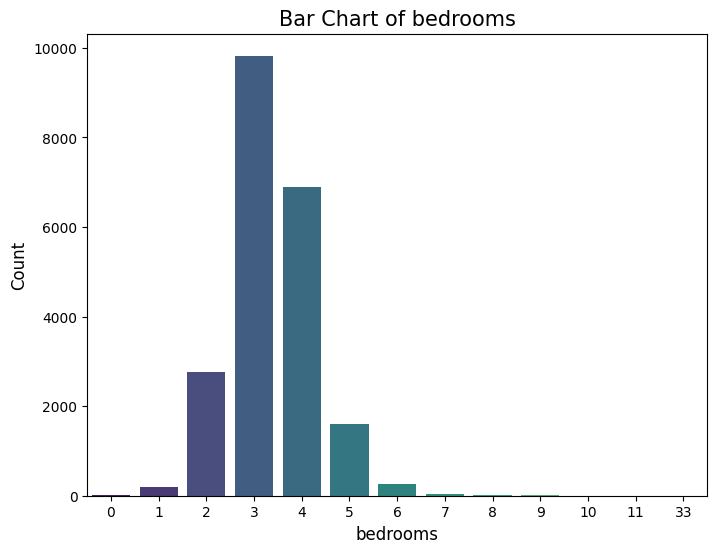

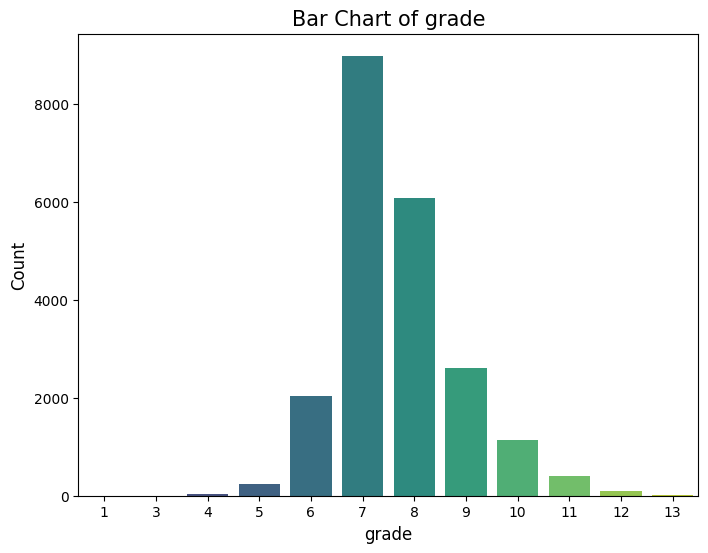

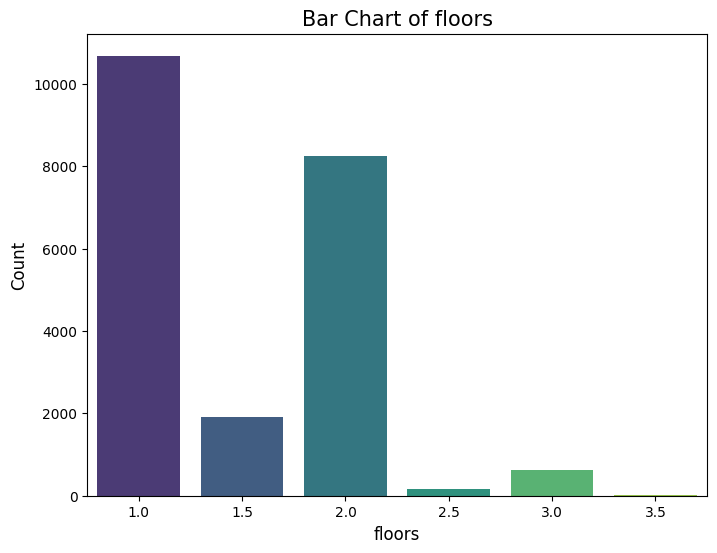

In [17]:
# Membuat bar chart untuk setiap fitur kategorikal
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=df, palette='viridis')
    plt.title(f'Bar Chart of {feature}', size=15)
    plt.xlabel(feature, size=12)
    plt.ylabel('Count', size=12)
    plt.show()

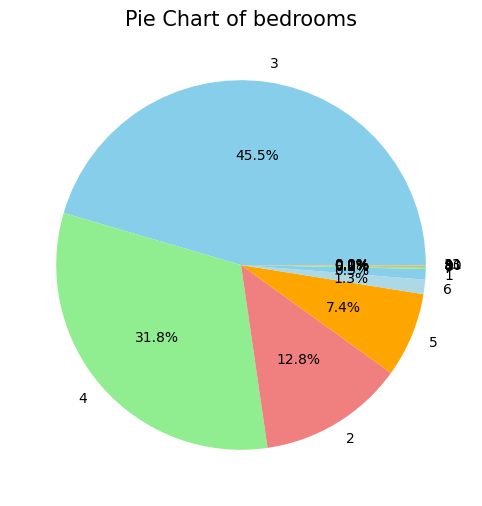

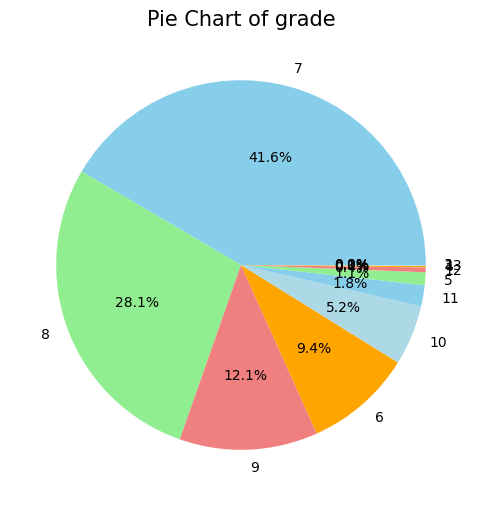

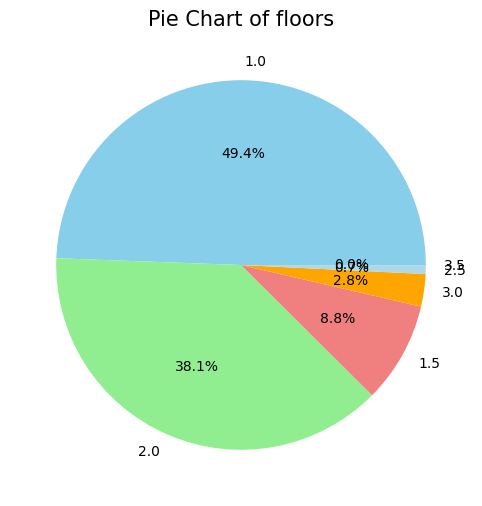

In [18]:
# Membuat pie chart untuk setiap fitur kategorikal
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    df[feature].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'orange', 'lightblue'])
    plt.title(f'Pie Chart of {feature}', size=15)
    plt.ylabel('')
    plt.show()

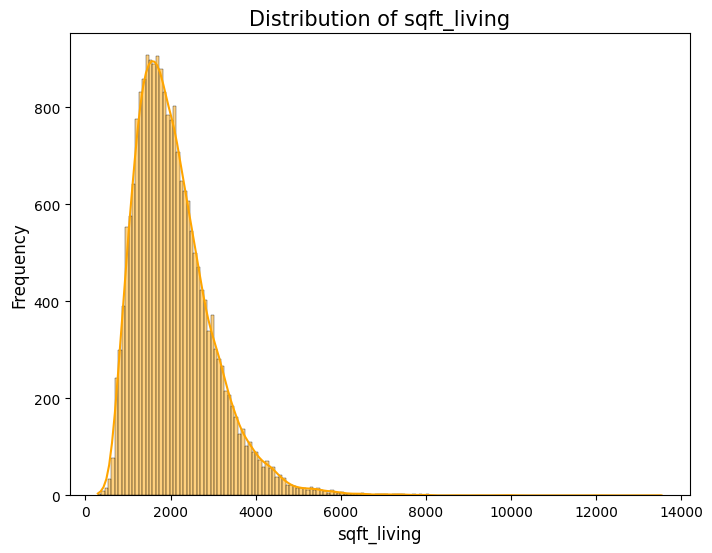

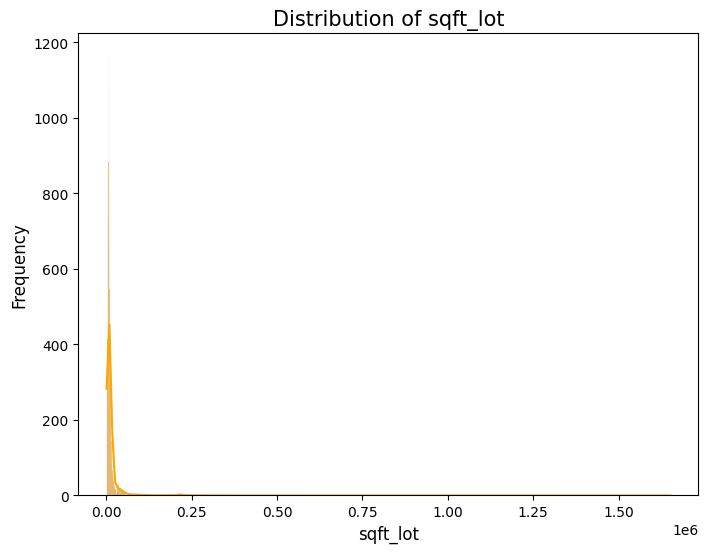

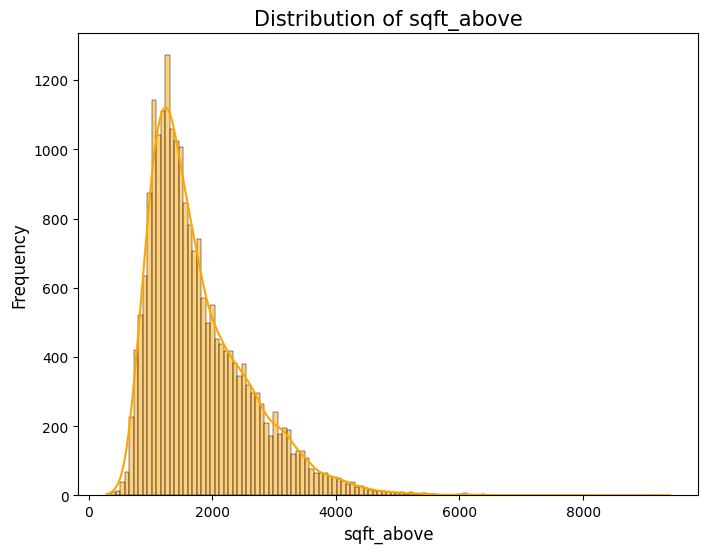

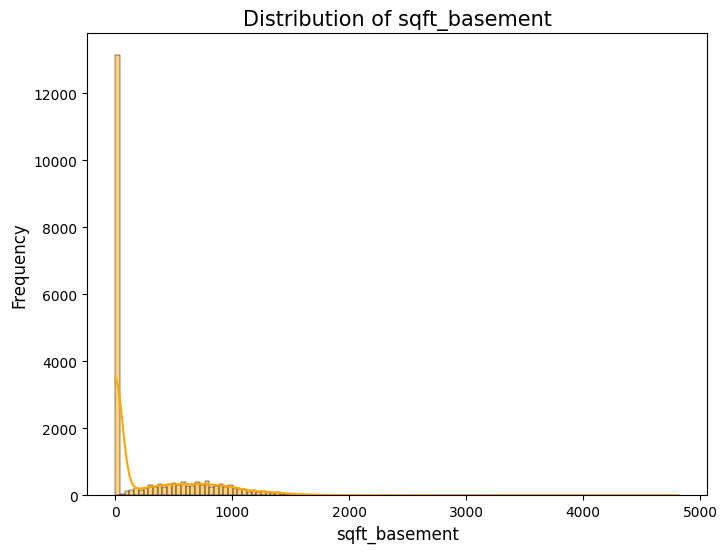

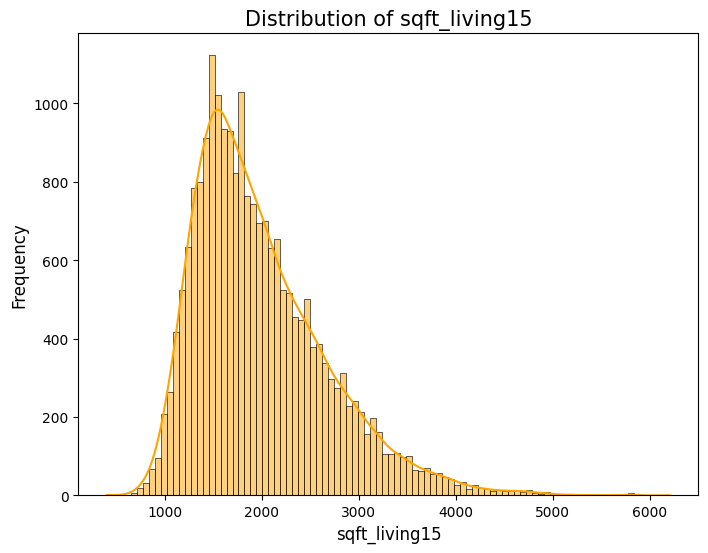

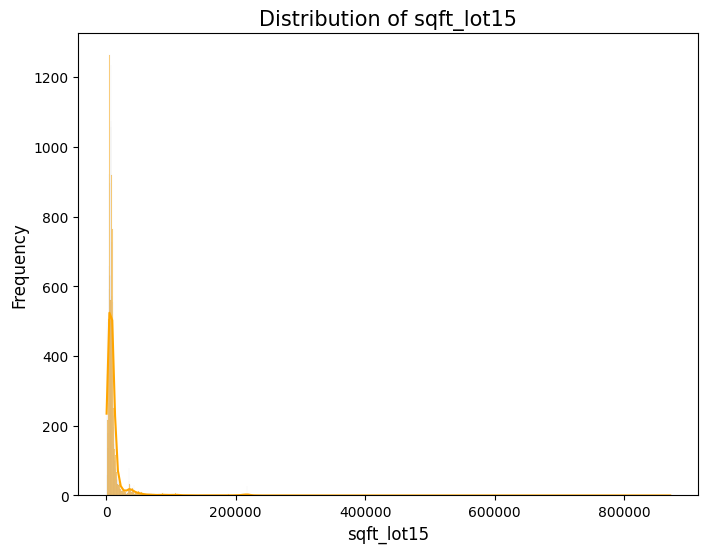

In [19]:
# Mengelompokkan numerical features
numerical_features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

# Membuat distribusi untuk setiap fitur numerik
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True, color='orange')
    plt.title(f'Distribution of {feature}', size=15)
    plt.xlabel(feature, size=12)
    plt.ylabel('Frequency', size=12)
    plt.show()

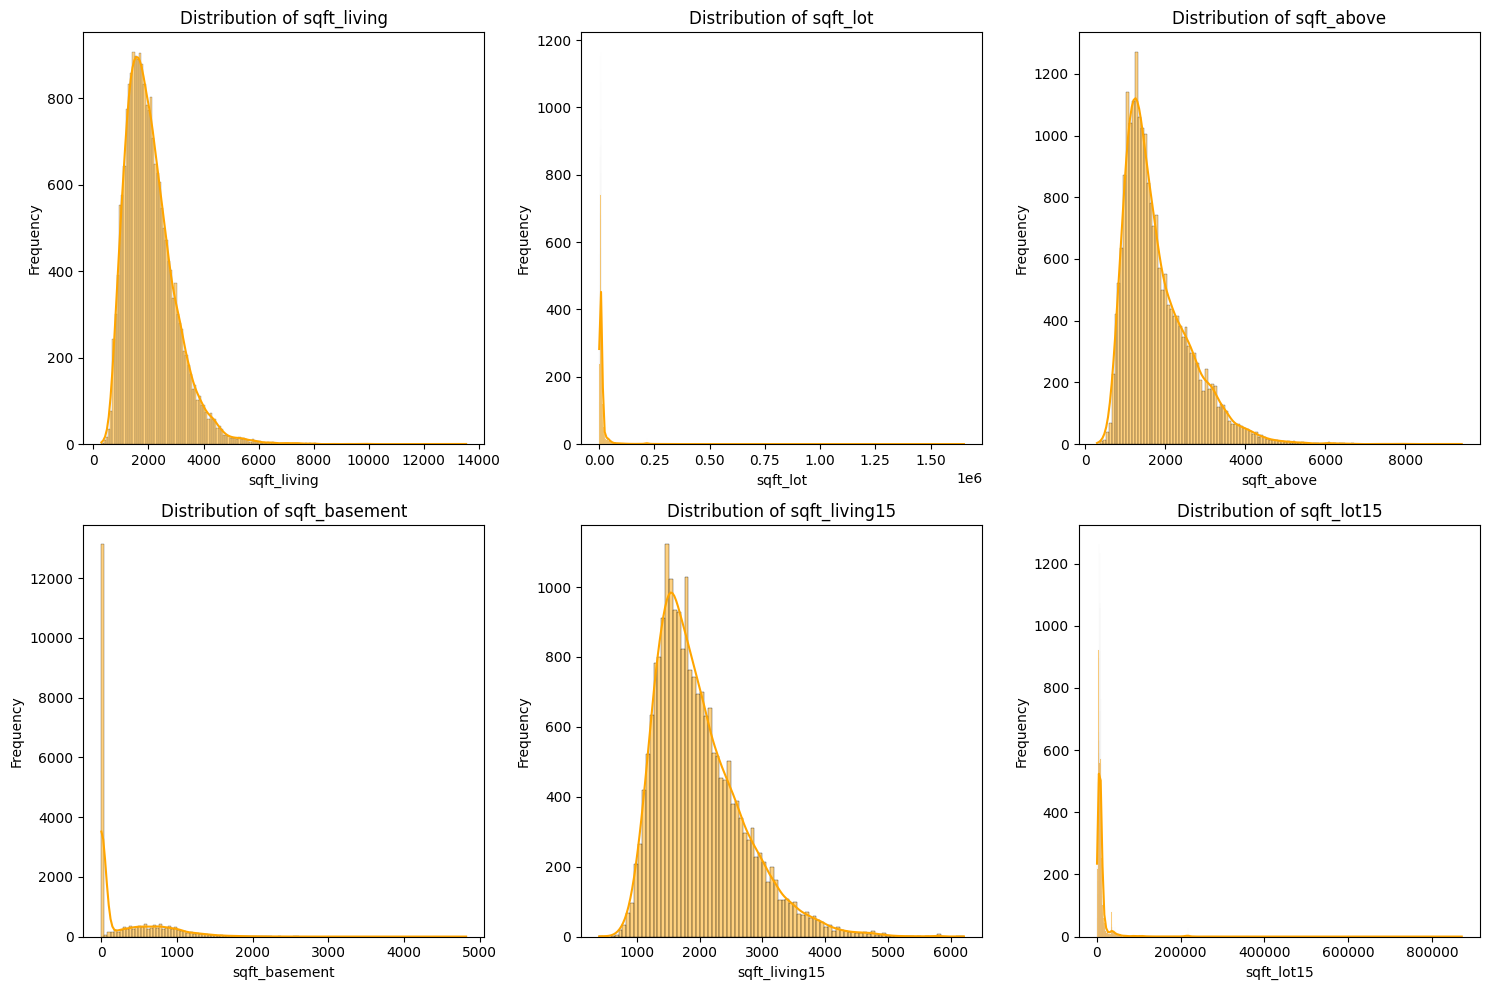

In [20]:
# Membuat distribusi untuk setiap fitur numerik dalam tata letak 2x3
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, color='orange', ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Distribution of {feature}', size=12)
    axes[i//3, i%3].set_xlabel(feature, size=10)
    axes[i//3, i%3].set_ylabel('Frequency', size=10)

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()

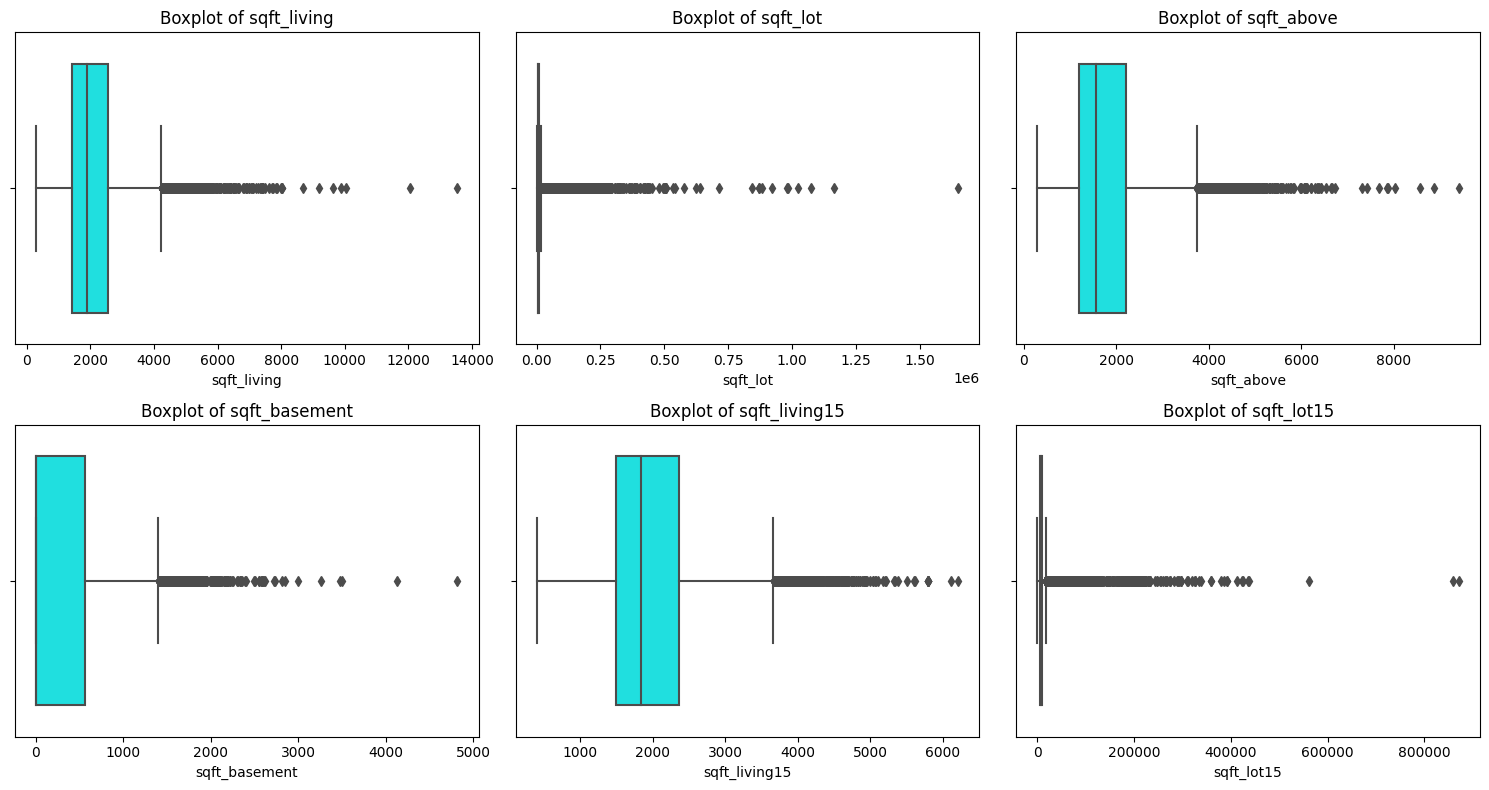

In [21]:
# Membuat boxplot untuk setiap fitur numerik dalam tata letak 2x3 dengan orientasi horizontal
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=df[feature], ax=axes[i // 3, i % 3], orient='h', color='cyan')
    axes[i // 3, i % 3].set_title(f'Boxplot of {feature}', size=12)
    axes[i // 3, i % 3].set_xlabel(feature, size=10)

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()
